### Setup the Spark VM and complete the below assignment

Objective:- Build a ML model to predict the employee compensation.
The application should be modelled using Spark.

You can refer to the below links for spark commands:- 
- https://spark.apache.org/docs/latest/ml-pipeline.html

- https://github.com/spark-in-action/first-edition

- https://github.com/FavioVazquez/first_spark_model

# Predicting Employee Compensation

## Data Dictionary
<br>**Year Type** - Fiscal (July through June) or Calendar (January through December)
<br>**Year** - An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.
<br>**Organization Group Code** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,Fire, Adult Probation, District Attorney, and Sheriff.
<br> **Organization Group** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,
Fire, Adult Probation, District Attorney, and Sheriff.
<br>**Department Code** - Departments are the primary organizational unit used by the Cityand County of San Francisco. Examples include Recreation and
Parks, Public Works, and the Police Department.
<br>**Department Code** - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.
<br>**Union Code** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Union** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Job Family Code** Job Family combines similar Jobs into meaningful groups.
<br>**Job Family** Job Family combines similar Jobs into meaningful groups.
<br>**Employee Identifier** Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset. The column does not appear on the
Employee Compensation report hosted on openbook.sfgov.org,
but that report does show one row for each employee. Employee
ID has been included here to allow users to reconstruct the
original report. Note that each employee’s identifier will change
each time this dataset is updated, so comparisons by employee
across multiple versions of the dataset are not possible.
<br>**Salaries** - Normal salaries paid to permanent or temporary City employees.
<br>**Overtime** - Amounts paid to City employees working in excess of 40 hours
per week.
<br>**Other Salaries** - Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. Total Salary Number The sum of all salaries paid to City employees.
<br>**Retirement** City contributions to employee retirement plans.
<br>**Health/Dental** City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits.
<br>**Other Benefits** Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment
insurance premiums, and minor discretionary benefits not included in the above categories.
<br>**Total Benefits** The sum of all benefits paid to City employees.
<br>**Total Compensation** The sum of all salaries and benefits paid to City employees.

Read the data and answer the following questions to predict employee compensation

## 1. Read the Data

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

# Create SparkSession
spark = SparkSession.builder \
    .appName("EmployeeCompensationAnalysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/11 16:58:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [8]:
# Load data into a DataFrame
df = spark.read.csv("Employee_Compensation.csv", header=True, inferSchema=True)

### 1.1 Display the number of rows and columns in the dataset

In [6]:
print("Number of rows: ", df.count())
print("Number of columns: ", len(df.columns))

Number of rows:  291825
Number of columns:  22


### 1.2 Check the datatype of the variables

In [9]:
df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



### 2. Convert the incorrect column type into its suitable column type. And drop the redundant features

In [12]:
redundant_columns = ['Organization Group ', 'Department', 'Union', 'Job Family ', 'Job Code']
emp_df = df.drop(*redundant_columns)

In [14]:
emp_df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



In [16]:
emp_df.show(10)

+---------+----+-----------------------+--------------------+---------------+----------+---------------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|  Organization Group|Department Code|Union Code|Job Family Code|          Job Family|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+--------------------+---------------+----------+---------------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|   Fiscal|2016|                      1|   Public Protection|            DAT|       311|           8100|       Legal & Court|              49919|114473.16|     0.0|        1500.0|   115973.16|  21025

### 3. Check basic statistics and perform necessary data preprocessing (Like removing negative amount)

In [20]:
emp_df.describe().show()

#remove negative numbers
from pyspark.sql.functions import col
emp_df = emp_df.filter((emp_df.Salaries >= 0 )&(emp_df.Overtime >= 0)&(col('Other Salaries') >= 0)&(col('Total Salary') >= 0)&(emp_df.Retirement >= 0)&(col('Health/Dental') >= 0)&(col('Other Benefits') >= 0)&(col('Total Benefits') >= 0)&(col('Total Compensation') >= 0))

emp_df.count()

24/06/11 17:12:36 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+---------+------------------+-----------------------+--------------------+---------------+------------------+-----------------+--------------------+-------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+------------------+
|summary|Year Type|              Year|Organization Group Code|  Organization Group|Department Code|        Union Code|  Job Family Code|          Job Family|Employee Identifier|          Salaries|          Overtime|   Other Salaries|      Total Salary|       Retirement|    Health/Dental|    Other Benefits|    Total Benefits|Total Compensation|
+-------+---------+------------------+-----------------------+--------------------+---------------+------------------+-----------------+--------------------+-------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+-

290391

### 4. Perform Missing Value Analysis

In [23]:
from pyspark.sql.functions import isnull, when, count, col

emp_df.select([count(when(isnull(c), c)).alias(c) for c in emp_df.columns]).show()

+---------+----+-----------------------+------------------+---------------+----------+---------------+----------+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Organization Group|Department Code|Union Code|Job Family Code|Job Family|Employee Identifier|Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+------------------+---------------+----------+---------------+----------+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|        0|   0|                      0|                 0|              0|        43|             45|        45|                  0|       0|       0|             0|           0|         0|            0|             0|             0|    

In [24]:
emp_df = emp_df.replace('null', None).dropna(how='any')
print(emp_df.count())

290346


In [25]:
emp_df.select([count(when(isnull(c), c)).alias(c) for c in emp_df.columns]).show()

+---------+----+-----------------------+------------------+---------------+----------+---------------+----------+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Organization Group|Department Code|Union Code|Job Family Code|Job Family|Employee Identifier|Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+------------------+---------------+----------+---------------+----------+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|        0|   0|                      0|                 0|              0|         0|              0|         0|                  0|       0|       0|             0|           0|         0|            0|             0|             0|    

### 5. Exploratory Data Analysis

#### 5.1. Find top compensating organizations. Display using bar plot

In [28]:
!pip install pandas --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 82.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 30.5 MB/s eta 0:00:00


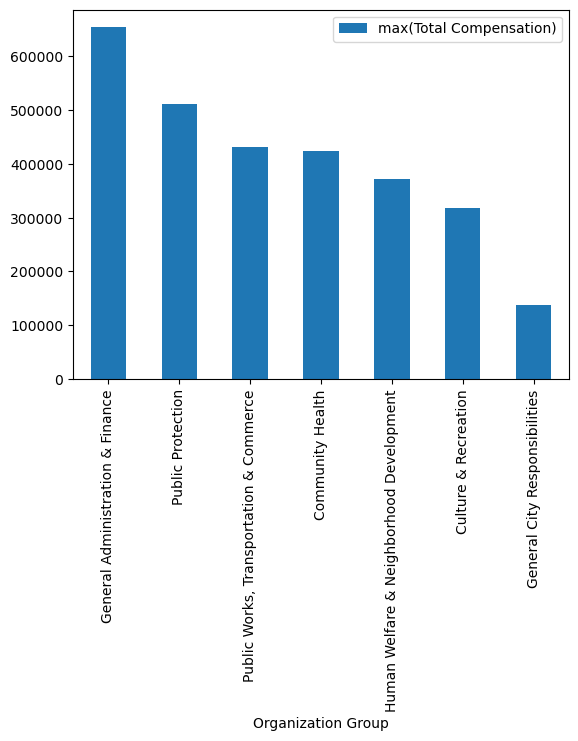

In [29]:
from pyspark.sql.functions import desc
import matplotlib.pyplot as plt
import pandas
org_df = emp_df.select("Organization Group","Total Compensation").groupby("Organization Group").agg({"Total Compensation":"max"}).sort(desc("max(Total Compensation)")).toPandas()
org_df.plot.bar(x="Organization Group", y="max(Total Compensation)")
plt.show()

#### 5.2. Find top Compensating Jobs. Display using bar plot

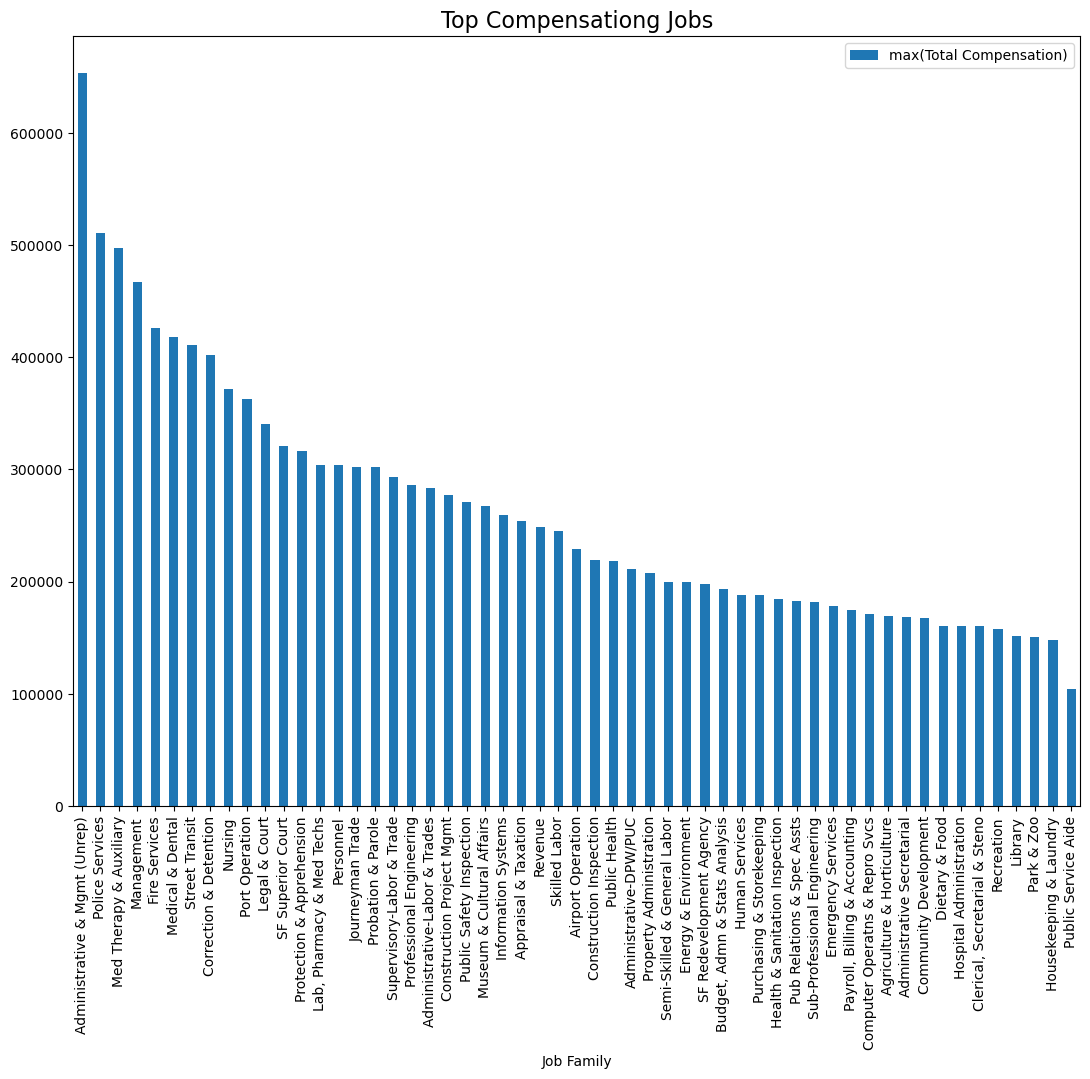

In [30]:
top_jobs_df = emp_df.select("Job Family","Total Compensation").groupby("Job Family").agg({"Total Compensation":"max"}).sort(desc("max(Total Compensation)")).toPandas()
fig, ax = plt.subplots(figsize=(13,10))
top_jobs_df.plot.bar(x="Job Family", y="max(Total Compensation)", ax=ax)
ax.set_title('Top Compensationg Jobs', fontsize=16)
plt.show()

#### 5.3. Check Correlation of Target Variable with Other Independent Variables. Plot Heatmap

In [31]:
numericalColumns = [item[0] for item in emp_df.dtypes if not item[1].startswith('string')]

In [32]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# Create the VectorAssembler object
assembler = VectorAssembler(inputCols=numericalColumns, outputCol="numerical_features")
assembled_df = assembler.transform(emp_df)
matrix = Correlation.corr(assembled_df, "numerical_features", 'pearson')
cor_np = matrix.collect()[0][matrix.columns[0]].toArray()

24/06/11 17:22:17 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


In [33]:
!pip install seaborn --break-system-packages
!pip install matplotlib --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 8.7 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable


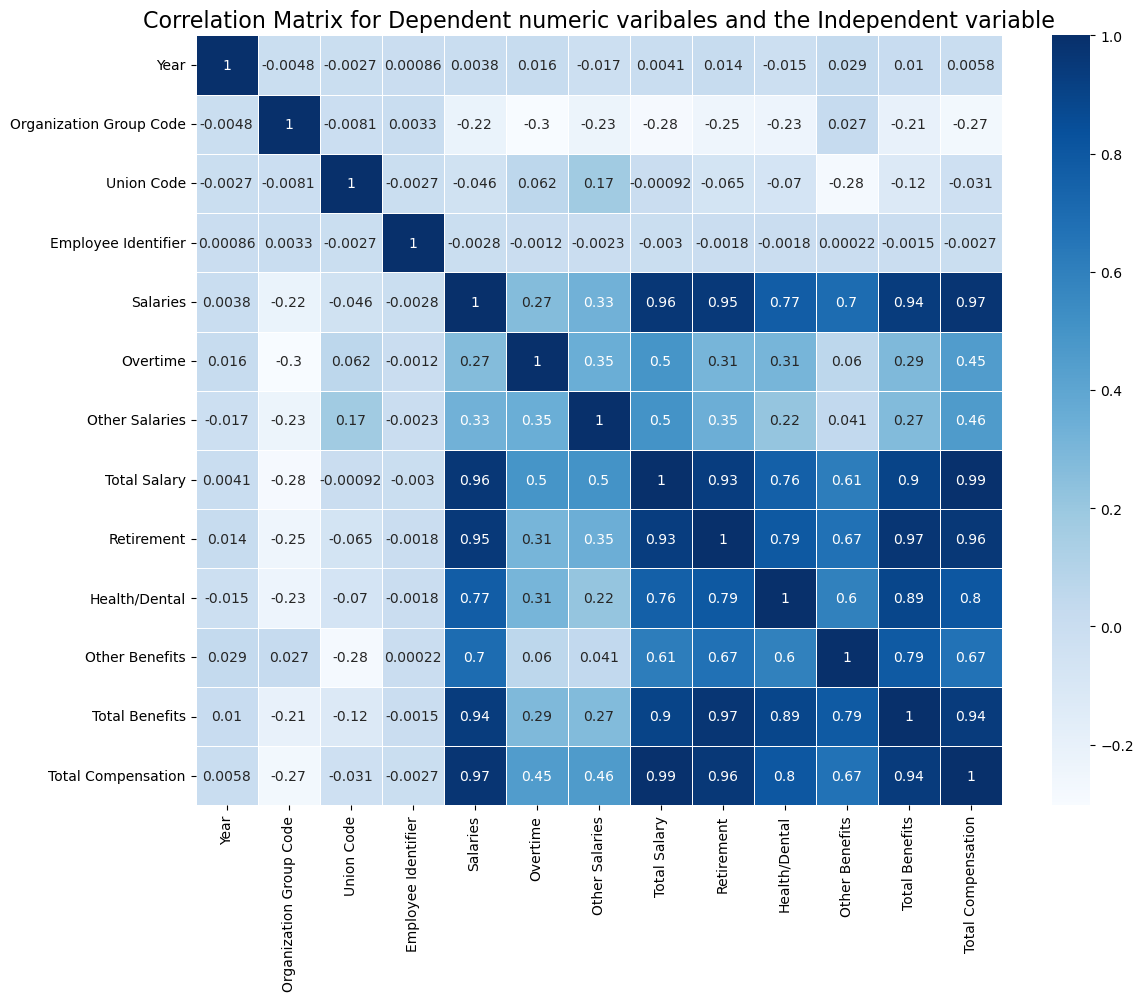

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(13,10))

sns.heatmap(cor_np, linewidths=.5, cmap='Blues',ax=ax, annot=True,
            xticklabels=numericalColumns, yticklabels=numericalColumns)
ax.set_title('Correlation Matrix for Dependent numeric varibales and the Independent variable', fontsize=16)
plt.show()

### 6. Perform necessary data pre-processing and divide the data into train and test set

### 6.1 Categorise the attributes into its type (Use one hot encoding wherever required)

In [35]:
categoricalColumns = [item[0] for item in emp_df.dtypes if item[1].startswith('string')]
numericalColumns = [item[0] for item in emp_df.dtypes if not item[1].startswith('string')]
print("Categorical Columns:", categoricalColumns)
print("Numerical Columns:", numericalColumns)

Categorical Columns: ['Year Type', 'Organization Group', 'Department Code', 'Job Family Code', 'Job Family']
Numerical Columns: ['Year', 'Organization Group Code', 'Union Code', 'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits', 'Total Benefits', 'Total Compensation']


In [36]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder,   StringIndexer, VectorAssembler

stages = []

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
print(stages)
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericalColumns
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

[StringIndexer_4b32cd15e0af, OneHotEncoder_63196bf9eb95, StringIndexer_29aa796c6ea6, OneHotEncoder_526fefab6d06, StringIndexer_19a789e76f9f, OneHotEncoder_c0979b51b1a4, StringIndexer_ff8c3ca9ead9, OneHotEncoder_991a10d9b6a4, StringIndexer_9bb66cd62ce2, OneHotEncoder_d6822429c972]


In [37]:
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(emp_df)

# Transform the DataFrame
df_encoded = pipelineModel.transform(emp_df)

# Select the relevant columns
selectedCols = ['features'] + numericalColumns + categoricalColumns
df_encoded = df_encoded.select(selectedCols)
df_encoded.show(5)

+--------------------+----+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+---------+--------------------+---------------+---------------+--------------------+
|            features|Year|Organization Group Code|Union Code|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Year Type|  Organization Group|Department Code|Job Family Code|          Job Family|
+--------------------+----+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+---------+--------------------+---------------+---------------+--------------------+
|(182,[0,3,26,76,1...|2016|                      1|       311|              49919|114473.16|     0.0|        1500.0|   115973.16|  21025

### 6.2 Split the data into train and test set

In [38]:
train_data, test_data = df_encoded.randomSplit([0.7,0.3], seed = 2000)



# Show the number of rows in each set
print(f"Training Data Count: {train_data.count()}")
print(f"Test Data Count: {test_data.count()}")

# Show a few rows from the training and test sets
train_data.show(5)
test_data.show(5)

Training Data Count: 203303


Test Data Count: 87043


+--------------------+----+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+---------+--------------------+---------------+---------------+--------------+
|            features|Year|Organization Group Code|Union Code|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Year Type|  Organization Group|Department Code|Job Family Code|    Job Family|
+--------------------+----+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+---------+--------------------+---------------+---------------+--------------+
|(182,[0,1,8,61,11...|2013|                      2|         6|               5789| 96757.94| 7671.73|       3127.94|   107557.61|  17665.14|     12487.87|

+--------------------+----+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+---------+--------------------+---------------+---------------+--------------+
|            features|Year|Organization Group Code|Union Code|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Year Type|  Organization Group|Department Code|Job Family Code|    Job Family|
+--------------------+----+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+---------+--------------------+---------------+---------------+--------------+
|(182,[0,1,8,61,11...|2013|                      2|       200|                304| 109359.0| 9402.66|       7729.96|   126491.62|  19951.59|     12894.11|

### 7. Fit Linear Regression model on the data and check its performance

In [39]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

lr = LinearRegression(featuresCol='features', labelCol='Total Compensation')
lr_model = lr.fit(train_data)
test_predictions = lr_model.transform(test_data)

test_predictions.show(5)

24/06/11 17:27:58 WARN Instrumentation: [d68b5d45] regParam is zero, which might cause numerical instability and overfitting.
24/06/11 17:28:04 WARN Instrumentation: [d68b5d45] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


+--------------------+----+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+---------+--------------------+---------------+---------------+--------------+------------------+
|            features|Year|Organization Group Code|Union Code|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Year Type|  Organization Group|Department Code|Job Family Code|    Job Family|        prediction|
+--------------------+----+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+---------+--------------------+---------------+---------------+--------------+------------------+
|(182,[0,1,8,61,11...|2013|                      2|       200|                304| 109359.0| 9402

In [40]:
evaluator = RegressionEvaluator(
    labelCol='Total Compensation', predictionCol='prediction', metricName='rmse')

# Calculate RMSE (Root Mean Squared Error)
rmse = evaluator.evaluate(test_predictions)
print(f"Root Mean Squared Error (RMSE) on test data = {rmse}")

# Calculate R2 (R-squared)
evaluator = RegressionEvaluator(
    labelCol='Total Compensation', predictionCol='prediction', metricName='r2')
r2 = evaluator.evaluate(test_predictions)
print(f"R Squared (R2) on test data = {r2}")

Root Mean Squared Error (RMSE) on test data = 0.8571267035457442


R Squared (R2) on test data = 0.9999999998395707


### 8. Fit Decision Tree Regression model on the data and check its performance (Optional)

In [44]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'Total Compensation')
dt_model = dt.fit(train_data)
test_pred = dt_model.transform(test_data)
test_pred.show(5)

+--------------------+----+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+---------+--------------------+---------------+---------------+--------------+------------------+
|            features|Year|Organization Group Code|Union Code|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Year Type|  Organization Group|Department Code|Job Family Code|    Job Family|        prediction|
+--------------------+----+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+---------+--------------------+---------------+---------------+--------------+------------------+
|(182,[0,1,8,61,11...|2013|                      2|       200|                304| 109359.0| 9402

In [45]:
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize the evaluator
eval_rmse = RegressionEvaluator(
    labelCol='Total Compensation', predictionCol='prediction', metricName='rmse')

eval_r2 = RegressionEvaluator(
    labelCol='Total Compensation', predictionCol='prediction', metricName='r2')

# Calculate RMSE (Root Mean Squared Error)
rmse = eval_rmse.evaluate(test_pred)
print(f"Root Mean Squared Error (RMSE) on test data = {rmse}")

# Calculate R2 (R-squared)
r2 = eval_r2.evaluate(test_pred)
print(f"R Squared (R2) on test data = {r2}")

Root Mean Squared Error (RMSE) on test data = 4491.15360463925


R Squared (R2) on test data = 0.9955953681960718


### Model Persistence (Optional)
Model persistence means saving your model to a disk. After you finalize your model for prediction depending upon the performance, you need to save the model to the disk. Let's say, you finalize 'lrmodel' to be used for in production environment i.e. in your application. We use the following code to save it.

##### Saving the model

In [48]:
# use save() method to save the model
# write().overwrite() is usually used when you want to replace the older model with a new one
# It might happen that you wish to retrain your model and save it at the same the place
lr_model.write().overwrite().save("lrmodel")

##### Loading the model

In [55]:
# import PipelineModel from pyspark.ml package
from pyspark.ml.regression import LinearRegressionModel

# load the model from the location it is stored
# The loaded model acts as PipelineModel
pipemodel = LinearRegressionModel.load("lrmodel")

# use the PipelineModel object to perform prediciton on test data. 
# Use .transform() to perfrom prediction
prediction = pipemodel.transform(test_data)

# print the results
prediction.select('Total Compensation', 'prediction').show(5)

+------------------+------------------+
|Total Compensation|        prediction|
+------------------+------------------+
|         167308.03| 167307.8479209584|
|          72816.97| 72816.98598413024|
|         140172.59|140172.62759157177|
|         122686.37|122686.57962020369|
|          222263.0| 222263.2577311904|
+------------------+------------------+
only showing top 5 rows

